# Microsoft App Store Data Sci Project

## Opening / Viewing Data

In [1]:
#importing libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading CSV  
df = pd.read_csv('msft.csv')

In [3]:
df.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [4]:
# interesting..., what is ₹? 
df.tail()

,Name,Rating,No of people Rated,Category,Date,Price
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00
5321,NaN,NaN,948,NaN,NaN,NaN


In [5]:
#checking shape 

df.shape

(5322, 6)

In [6]:
# checking dtypes

df.dtypes

Name                   object
Rating                float64
No of people Rated      int64
Category               object
Date                   object
Price                  object
dtype: object

## Data Organizing/Cleaning

In [7]:
df.head()

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [8]:
# making all columns lowercase for easier data access

df.columns = df.columns.str.lower()

In [9]:
df.head()

,name,rating,no of people rated,category,date,price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [10]:
# renaming no people rated to num_of_people_rated

df.rename(columns={'name':'app','no of people rated' : 'num_of_people_rated'}, inplace=True)

In [11]:
df.head()

,app,rating,num_of_people_rated,category,date,price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free


In [12]:
#change category datatype into categorical variable

df.category = df.category.astype('category')

In [13]:
#Convert date into datetime format 

df.date = pd.to_datetime(df.date)

In [14]:
#added a year column
df['year'] = pd.DatetimeIndex(df.date).year

In [15]:
#added a month_name column 

df['month'] = pd.DatetimeIndex(df.date).month_name()

In [16]:
df.head()

,app,rating,num_of_people_rated,category,date,price,year,month
0,Dynamic Reader,3.5,268,Books,2014-07-01,Free,2014.0,July
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-08-01,Free,2014.0,August
2,BookViewer,3.5,593,Books,2016-02-29,Free,2016.0,February
3,Brick Instructions,3.5,684,Books,2018-01-30,Free,2018.0,January
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,Free,2018.0,January


In [17]:
#validate changes 
df.dtypes

app                            object
rating                        float64
num_of_people_rated             int64
category                     category
date                   datetime64[ns]
price                          object
year                          float64
month                          object
dtype: object

In [18]:
df.head()

,app,rating,num_of_people_rated,category,date,price,year,month
0,Dynamic Reader,3.5,268,Books,2014-07-01,Free,2014.0,July
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-08-01,Free,2014.0,August
2,BookViewer,3.5,593,Books,2016-02-29,Free,2016.0,February
3,Brick Instructions,3.5,684,Books,2018-01-30,Free,2018.0,January
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,Free,2018.0,January


In [19]:
#Checking for NaN values in all rows 

df.isnull().sum()

app                    1
rating                 1
num_of_people_rated    0
category               1
date                   1
price                  1
year                   1
month                  1
dtype: int64

In [20]:
#using boolean masking to see which rows are NaN 
df[df.isnull().any(axis=1)]

,app,rating,num_of_people_rated,category,date,price,year,month
5321,NaN,NaN,948,NaN,NaT,NaN,NaN,NaN


In [21]:
#drop rows with non type values
df.dropna(axis='rows', how='any', inplace=True)

In [22]:
#change year and month from float64 to int64, reassign to original dataframe

df = df.astype({'year': 'int64', 'month' : 'category'})

In [23]:
df.isna().sum()

app                    0
rating                 0
num_of_people_rated    0
category               0
date                   0
price                  0
year                   0
month                  0
dtype: int64

In [24]:
#checking for duplicates
df.duplicated().value_counts()

False    5321
dtype: int64

In [25]:
df.head()

,app,rating,num_of_people_rated,category,date,price,year,month
0,Dynamic Reader,3.5,268,Books,2014-07-01,Free,2014,July
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-08-01,Free,2014,August
2,BookViewer,3.5,593,Books,2016-02-29,Free,2016,February
3,Brick Instructions,3.5,684,Books,2018-01-30,Free,2018,January
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,Free,2018,January


In [26]:
#round ratings go remove 3.5 

df.rating = df.rating.apply(lambda x: np.round(x))

In [27]:
df.head()

,app,rating,num_of_people_rated,category,date,price,year,month
0,Dynamic Reader,4.0,268,Books,2014-07-01,Free,2014,July
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-08-01,Free,2014,August
2,BookViewer,4.0,593,Books,2016-02-29,Free,2016,February
3,Brick Instructions,4.0,684,Books,2018-01-30,Free,2018,January
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,Free,2018,January


In [28]:
# check if price values are all free or not 

df.price.unique()

array(['Free', '₹ 144.00', '₹ 54.00', '₹ 99.00', '₹ 219.00', '₹ 269.00',
       '₹ 134.00', '₹ 164.00', '₹ 109.00', '₹ 1,624.00', '₹ 1,099.00',
       '₹ 1,349.00', '₹ 59.00', '₹ 154.00', '₹ 119.00', '₹ 94.00',
       '₹ 69.00', '₹ 139.00', '₹ 189.00', '₹ 549.00', '₹ 79.00',
       '₹ 2,599.00', '₹ 299.00', '₹ 574.00', '₹ 329.40', '₹ 1,521.80',
       '₹ 324.00', '₹ 824.00', '₹ 5,449.00', '₹ 89.50', '₹ 114.00',
       '₹ 194.00', '₹ 319.00', '₹ 624.00', '₹ 2,149.00', '₹ 1,149.00',
       '₹ 434.00', '₹ 279.00', '₹ 209.00', '₹ 699.00', '₹ 1,899.00',
       '₹ 489.00', '₹ 54.50', '₹ 64.00'], dtype=object)

In [29]:
# change value 'Free' to '0' , if int64 it will affect all the other values

df.loc[df['price'] == 'Free', 'price'] = '0'

In [30]:
df.price.unique()

array(['0', '₹ 144.00', '₹ 54.00', '₹ 99.00', '₹ 219.00', '₹ 269.00',
       '₹ 134.00', '₹ 164.00', '₹ 109.00', '₹ 1,624.00', '₹ 1,099.00',
       '₹ 1,349.00', '₹ 59.00', '₹ 154.00', '₹ 119.00', '₹ 94.00',
       '₹ 69.00', '₹ 139.00', '₹ 189.00', '₹ 549.00', '₹ 79.00',
       '₹ 2,599.00', '₹ 299.00', '₹ 574.00', '₹ 329.40', '₹ 1,521.80',
       '₹ 324.00', '₹ 824.00', '₹ 5,449.00', '₹ 89.50', '₹ 114.00',
       '₹ 194.00', '₹ 319.00', '₹ 624.00', '₹ 2,149.00', '₹ 1,149.00',
       '₹ 434.00', '₹ 279.00', '₹ 209.00', '₹ 699.00', '₹ 1,899.00',
       '₹ 489.00', '₹ 54.50', '₹ 64.00'], dtype=object)

In [31]:
# remove ₹, represents Indian Rupee Currency, remove whitespace with strip

df.price = df.price.apply(lambda x: x.replace("₹","").strip())

In [32]:
df.price.unique()

array(['0', '144.00', '54.00', '99.00', '219.00', '269.00', '134.00',
       '164.00', '109.00', '1,624.00', '1,099.00', '1,349.00', '59.00',
       '154.00', '119.00', '94.00', '69.00', '139.00', '189.00', '549.00',
       '79.00', '2,599.00', '299.00', '574.00', '329.40', '1,521.80',
       '324.00', '824.00', '5,449.00', '89.50', '114.00', '194.00',
       '319.00', '624.00', '2,149.00', '1,149.00', '434.00', '279.00',
       '209.00', '699.00', '1,899.00', '489.00', '54.50', '64.00'],
      dtype=object)

In [33]:
#subsitute , with "" for numbers like 2,599.00

df.price = df.price.apply(lambda x: x.replace(",",""))

In [34]:
df.price.unique()

array(['0', '144.00', '54.00', '99.00', '219.00', '269.00', '134.00',
       '164.00', '109.00', '1624.00', '1099.00', '1349.00', '59.00',
       '154.00', '119.00', '94.00', '69.00', '139.00', '189.00', '549.00',
       '79.00', '2599.00', '299.00', '574.00', '329.40', '1521.80',
       '324.00', '824.00', '5449.00', '89.50', '114.00', '194.00',
       '319.00', '624.00', '2149.00', '1149.00', '434.00', '279.00',
       '209.00', '699.00', '1899.00', '489.00', '54.50', '64.00'],
      dtype=object)

In [35]:
#convert everything to a float

df.price = df.price.astype('float32')

In [36]:
#validate the values in the series
df.price.sample(10)

804     0.0
2265    0.0
3310    0.0
996     0.0
617     0.0
4964    0.0
1784    0.0
2721    0.0
1039    0.0
4841    0.0
Name: price, dtype: float32

In [37]:
df.head()

,app,rating,num_of_people_rated,category,date,price,year,month
0,Dynamic Reader,4.0,268,Books,2014-07-01,0.0,2014,July
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-08-01,0.0,2014,August
2,BookViewer,4.0,593,Books,2016-02-29,0.0,2016,February
3,Brick Instructions,4.0,684,Books,2018-01-30,0.0,2018,January
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,0.0,2018,January


In [38]:
#1) create two dataframes to analyze
#2) view sample sizes, and need to make them all equal to each other for accurate analysis

free_apps = df.loc[df['price'] == 0]
priced_apps = df.loc[df['price'] != 0]

In [39]:
free_apps.rating.value_counts().sort_index()

1.0     143
2.0     462
3.0     605
4.0    2997
5.0     956
Name: rating, dtype: int64

In [40]:
priced_apps.rating.value_counts().sort_index()

1.0    58
2.0    32
3.0    10
4.0    46
5.0    12
Name: rating, dtype: int64

In [41]:
# because the number of apps are different, we will cut into two dataframes that will have equal sample sizes
# for free apps and priced apps 

In [42]:
# create a for loop that takes in the ratings 2.0, 3.0, 4.0, 5.0 
# reset_index, and we can drop certain rows to get 143 rows with .iloc
# the variable in the loop will be the new dataframe concatenated by an empty declared dataframe(outside loop)
# + the edited dataframes we sliced with .iloc
# then we can open this dataframe and it should work

empty_df = free_apps[free_apps['rating'] == 1.0].reset_index(drop=True).iloc[0:143, :]

for i in [2.0, 3.0, 4.0, 5.0]:
  
    free_df = free_apps[free_apps['rating'] == i].reset_index(drop=True).iloc[0:143, :]
    
    empty_df = pd.concat([empty_df, free_df])

display(empty_df)


,app,rating,num_of_people_rated,category,date,price,year,month
0,IPC sections,1.0,931,Books,2016-11-07,0.0,2016,November
1,Religious of World,1.0,186,Books,2016-04-26,0.0,2016,April
2,HMSEpub,1.0,648,Books,2018-01-30,0.0,2018,January
3,Story Shelf,1.0,458,Books,2016-05-03,0.0,2016,May
4,Paints,1.0,891,Books,2018-11-02,0.0,2018,November
...,...,...,...,...,...,...,...,...
138,The Formula Calculator,5.0,397,Books,2018-09-07,0.0,2018,September
139,The Jewel of Seven Stars story,5.0,314,Books,2017-02-28,0.0,2017,February
140,"The Yellow Wallpaper, by Charlotte Perkins Gilman",5.0,912,Books,2018-02-07,0.0,2018,February
141,"PDF X: PDF Editor, PDF Reader, Annotate PDF",5.0,452,Business,2019-09-24,0.0,2019,September


In [43]:
# we can now reset the index of the new data frame 

no_cost_df = empty_df.reset_index(drop=True)

In [44]:
#validating that there is an equal sample size to analyze

no_cost_df['rating'].value_counts().sort_index()

1.0    143
2.0    143
3.0    143
4.0    143
5.0    143
Name: rating, dtype: int64

In [45]:
no_cost_df

,app,rating,num_of_people_rated,category,date,price,year,month
0,IPC sections,1.0,931,Books,2016-11-07,0.0,2016,November
1,Religious of World,1.0,186,Books,2016-04-26,0.0,2016,April
2,HMSEpub,1.0,648,Books,2018-01-30,0.0,2018,January
3,Story Shelf,1.0,458,Books,2016-05-03,0.0,2016,May
4,Paints,1.0,891,Books,2018-11-02,0.0,2018,November
...,...,...,...,...,...,...,...,...
710,The Formula Calculator,5.0,397,Books,2018-09-07,0.0,2018,September
711,The Jewel of Seven Stars story,5.0,314,Books,2017-02-28,0.0,2017,February
712,"The Yellow Wallpaper, by Charlotte Perkins Gilman",5.0,912,Books,2018-02-07,0.0,2018,February
713,"PDF X: PDF Editor, PDF Reader, Annotate PDF",5.0,452,Business,2019-09-24,0.0,2019,September


In [46]:
# apply the same for loop to form no_cost_df to the priced apps, reduce to only 10 values to have equal sample sizes

priced_df = df[(df['price'] != 0) & (df['rating'] == 3.0)].reset_index(drop=True)

for i in [1.0, 2.0, 4.0, 5.0]: 
    
    df_to_concat = df[(df['price'] != 0) & (df['rating'] == i)].reset_index(drop=True).iloc[0:10, :]
    
    priced_df = pd.concat([priced_df, df_to_concat])


In [47]:
priced_df = priced_df.sort_values('rating').reset_index(drop=True)

In [48]:
display(priced_df.head())

priced_df.shape

,app,rating,num_of_people_rated,category,date,price,year,month
0,WinRAR User Guide app,1.0,854,Books,2020-02-24,119.0,2020,February
1,Mobi Books (Kindle),1.0,234,Books,2020-10-06,269.0,2020,October
2,"eBook Reader (ePub, Mobi and PDF books)",1.0,824,Books,2020-05-25,269.0,2020,May
3,eBooks for Kindle,1.0,450,Books,2020-06-05,269.0,2020,June
4,Camtasia Tutor,1.0,495,Books,2020-06-22,269.0,2020,June


(50, 8)

In [49]:
# because price is in terms of indian rupees, need to multiply by 0.014 to obtain US dollars
# to both original df, and priced_df 'price' columns 

In [50]:
df['price'] = np.round(df['price'] * 0.014)
priced_df['price'] = np.round(priced_df['price'] * 0.014)

In [51]:
priced_df.head()

,app,rating,num_of_people_rated,category,date,price,year,month
0,WinRAR User Guide app,1.0,854,Books,2020-02-24,2.0,2020,February
1,Mobi Books (Kindle),1.0,234,Books,2020-10-06,4.0,2020,October
2,"eBook Reader (ePub, Mobi and PDF books)",1.0,824,Books,2020-05-25,4.0,2020,May
3,eBooks for Kindle,1.0,450,Books,2020-06-05,4.0,2020,June
4,Camtasia Tutor,1.0,495,Books,2020-06-22,4.0,2020,June


In [52]:
# We now have three dataframes, the original dataframe w/ free + priced (df), free app dataframe(no_cost_df)
# and priced app dataframe (priced_df)

display(df.head())

df.shape

,app,rating,num_of_people_rated,category,date,price,year,month
0,Dynamic Reader,4.0,268,Books,2014-07-01,0.0,2014,July
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,2014-08-01,0.0,2014,August
2,BookViewer,4.0,593,Books,2016-02-29,0.0,2016,February
3,Brick Instructions,4.0,684,Books,2018-01-30,0.0,2018,January
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,2018-01-30,0.0,2018,January


(5321, 8)

In [53]:
#free app dataframe(no_cost_df)
display(no_cost_df.head())

no_cost_df.shape


,app,rating,num_of_people_rated,category,date,price,year,month
0,IPC sections,1.0,931,Books,2016-11-07,0.0,2016,November
1,Religious of World,1.0,186,Books,2016-04-26,0.0,2016,April
2,HMSEpub,1.0,648,Books,2018-01-30,0.0,2018,January
3,Story Shelf,1.0,458,Books,2016-05-03,0.0,2016,May
4,Paints,1.0,891,Books,2018-11-02,0.0,2018,November


(715, 8)

In [54]:
# and priced app dataframe (priced_df)
display(priced_df.head())

priced_df.shape

,app,rating,num_of_people_rated,category,date,price,year,month
0,WinRAR User Guide app,1.0,854,Books,2020-02-24,2.0,2020,February
1,Mobi Books (Kindle),1.0,234,Books,2020-10-06,4.0,2020,October
2,"eBook Reader (ePub, Mobi and PDF books)",1.0,824,Books,2020-05-25,4.0,2020,May
3,eBooks for Kindle,1.0,450,Books,2020-06-05,4.0,2020,June
4,Camtasia Tutor,1.0,495,Books,2020-06-22,4.0,2020,June


(50, 8)

## Visualizations / Analysis

### For a certain rating, which rating has the highest number of people involved in rating the app? 

In [55]:
#creating separate dataframe based on groupby that takes the total sum of the number of ratings for an free app.

free_apps_sum = no_cost_df.groupby('rating')['num_of_people_rated'].sum().reset_index()

In [56]:
free_apps_sum

,rating,num_of_people_rated
0,1.0,76216
1,2.0,75561
2,3.0,73148
3,4.0,78908
4,5.0,80399


In [57]:
#creating separate dataframe based on groupby that takes the total sum of the number of ratings for an priced app.

priced_apps_sum = priced_df.groupby('rating')['num_of_people_rated'].sum().reset_index()

In [58]:
priced_apps_sum

,rating,num_of_people_rated
0,1.0,5898
1,2.0,5602
2,3.0,4684
3,4.0,3998
4,5.0,6262


In [59]:
#no_cost_df(free apps)

rating_map = {1.0:'One Star', 2.0:'Two Star', 3.0:'Three Star', 4.0:'Four Star', 5.0:'Five Star'}


In [60]:
# using .map series function to make these ratings into categories 

free_apps_sum.rating = free_apps_sum.rating.map(rating_map)

In [61]:
# using .map series function to make these ratings into categories 
priced_apps_sum.rating = priced_apps_sum.rating.map(rating_map)

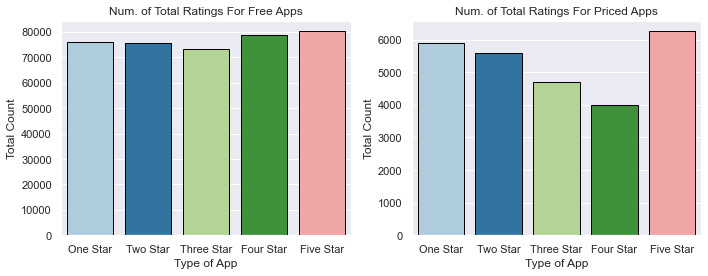

In [62]:
# visualization of the free apps 

sns.set(style='darkgrid',palette = 'Paired',color_codes = True)

fig, axes = plt.subplots(1,2, figsize = (10,4), sharex = True, sharey = False )

ax1 = sns.barplot('rating','num_of_people_rated', data=free_apps_sum ,orient="v", edgecolor = 'black', ax=axes[0])
ax2 = sns.barplot('rating','num_of_people_rated', data=priced_apps_sum, orient="v", edgecolor = 'black', ax=axes[1])

ax1.set(title='Num. of Total Ratings For Free Apps', xlabel = 'Type of App', ylabel = 'Total Count')
ax2.set(title='Num. of Total Ratings For Priced Apps', xlabel = 'Type of App', ylabel = 'Total Count')
plt.tight_layout()
plt.show()

### What is the average rating of each free/priced app? What are the max, min,  and standard deviation values?

In [63]:
#priced_cost_df(priced df)

no_cost_df.rating = no_cost_df.rating.map(rating_map)

In [64]:
priced_df.rating = priced_df.rating.map(rating_map)

Statistical Data on Free Apps


,rating,count,mean,std,min,25%,50%,75%,max
0,Five Star,143.0,562.230769,259.697839,100.0,328.0,600.0,788.0,998.0
1,Four Star,143.0,551.804196,251.990086,108.0,346.5,583.0,753.0,997.0
2,One Star,143.0,532.979021,248.450620,108.0,305.5,546.0,724.0,986.0
3,Two Star,143.0,528.398601,250.235274,101.0,325.5,494.0,754.0,997.0
4,Three Star,143.0,511.524476,271.775017,106.0,262.0,486.0,756.0,1000.0


Statistical Data on Priced Apps


,rating,count,mean,std,min,25%,50%,75%,max
0,Five Star,10.0,626.2,180.688683,360.0,488.75,626.5,762.75,923.0
1,One Star,10.0,589.8,203.367647,234.0,472.50,519.0,787.00,854.0
2,Two Star,10.0,560.2,263.397798,163.0,342.25,542.0,743.25,964.0
3,Three Star,10.0,468.4,261.477936,117.0,306.00,382.5,658.00,937.0
4,Four Star,10.0,399.8,254.047152,104.0,216.00,341.0,569.50,866.0


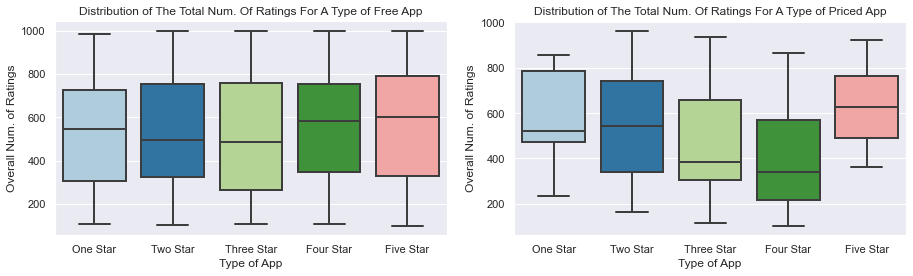

In [65]:
# Statistical Data on Free Apps
print('Statistical Data on Free Apps')
display(no_cost_df.groupby('rating')['num_of_people_rated'].describe().sort_values('mean', 
                                                                                   ascending = False).reset_index())

# Statistical Data on Priced Apps
print('Statistical Data on Priced Apps')
display(priced_df.groupby('rating')['num_of_people_rated'].describe().sort_values('mean', 
                                                                                   ascending = False).reset_index())

#Using Box Plot to display the Data
sns.set(style='darkgrid', palette = 'Paired', color_codes = True)

fig, axes = plt.subplots(1,2, figsize = (13, 4)) 

ax1 = sns.boxplot('rating', 'num_of_people_rated',data = no_cost_df, ax=axes[0], linewidth = 2.0)
ax2 = sns.boxplot('rating', 'num_of_people_rated',data = priced_df, ax=axes[1], linewidth = 2.0)

ax1.set(title='Distribution of The Total Num. Of Ratings For A Type of Free App', 
        xlabel = 'Type of App', ylabel = 'Overall Num. of Ratings')

ax2.set(title='Distribution of The Total Num. Of Ratings For A Type of Priced App', 
        xlabel = 'Type of App', ylabel = 'Overall Num. of Ratings')

fig.tight_layout()

###  List the 5 months that have the highest average number of ratings for free/priced apps? 

In [66]:
#Free Apps groupby which groups the data by month, and
#returns the highest average number of ratings for a free app in a specific month.

no_cost_df.groupby('month')['num_of_people_rated'].agg(['mean']).sort_values('mean', 
                                                                             ascending = False).reset_index().head()


,month,mean
0,September,569.750000
1,May,562.142857
2,January,557.129412
3,October,554.632353
4,November,545.734375


In [67]:
#Priced Apps groupby which groups the data by month, and
#returnsthe highest average number of ratings for a priced app in a specific month

priced_df.groupby('month')['num_of_people_rated'].agg(['mean']).sort_values('mean', 
                                                                             ascending = False).reset_index().head()


,month,mean
0,February,796.750000
1,September,678.250000
2,April,673.000000
3,December,659.666667
4,August,624.200000


### Does the number of ratings for an app increase when an app is priced?

In [68]:
#Using the price_df data to graph 

price_num_df = priced_df[['price', 'num_of_people_rated']]

In [69]:
# sets the df to sort the values by price, resets index to be graphable 
price_num_df = price_num_df.sort_values('price').reset_index(drop=True)

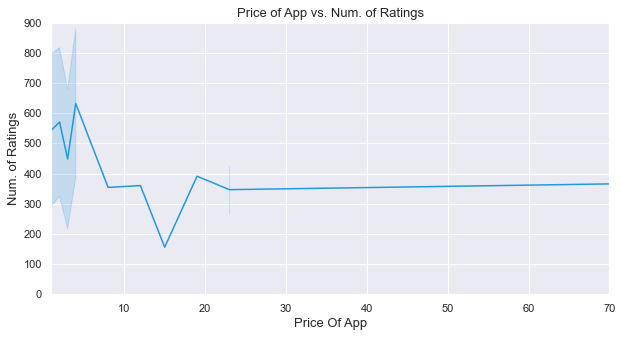

In [70]:
#visualization

sns.set(style = 'darkgrid')
figure, ax = plt.subplots(figsize = (10,5))

ax1 = sns.lineplot('price', 'num_of_people_rated', data=price_num_df, 
                   color = "#2297E0", ax = ax, err_style = 'band', ci = 'sd')

ax1.set_ylim(0,900)
ax1.set_xlim(1,70)

ax1.set_xlabel('Price Of App', fontdict={'fontsize' : 13})
ax1.set_ylabel('Num. of Ratings', fontdict={'fontsize': 13})
ax1.set_title('Price of App vs. Num. of Ratings', fontdict = {'fontsize': 13})


plt.show()

###  For a certain year, which year accumulated the highest num. of ratings for free/priced apps?

In [71]:
# free apps groupby, groups the total number of people rated for a free app in a specific year

year_free_df = no_cost_df.groupby('year')['num_of_people_rated'].sum().reset_index() 

In [72]:
year_free_df

,year,num_of_people_rated
0,2011,2419
1,2012,22025
2,2013,31808
3,2014,42801
4,2015,43908
5,2016,64274
6,2017,63479
7,2018,74920
8,2019,28688
9,2020,9910


In [73]:
# priced apps groupby, groups the total number of people rated for a priced app in a specific year

year_price_df = priced_df.groupby('year')['num_of_people_rated'].sum().reset_index()

In [74]:
year_price_df 

,year,num_of_people_rated
0,2011,291
1,2012,693
2,2013,1269
3,2014,1357
4,2015,870
5,2016,1256
6,2017,1601
7,2018,1336
8,2019,6849
9,2020,10922


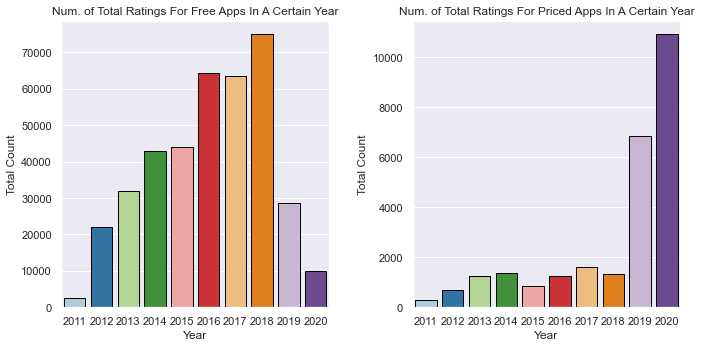

In [75]:
#visualization 
sns.set(style='darkgrid',palette = 'Paired',color_codes = True)
fig, axes = plt.subplots(1,2, figsize = (10,5), sharex = True, sharey = False )

ax1 = sns.barplot('year','num_of_people_rated', data= year_free_df ,orient="v", edgecolor = 'black', ax=axes[0])

ax2 = sns.barplot('year','num_of_people_rated', data= year_price_df, orient="v", edgecolor = 'black', ax=axes[1])

ax1.set(title='Num. of Total Ratings For Free Apps In A Certain Year', xlabel = 'Year', ylabel = 'Total Count')

ax2.set(title='Num. of Total Ratings For Priced Apps In A Certain Year', xlabel = 'Year', ylabel = 'Total Count')

plt.tight_layout()
plt.show()

### In a specific category, which free app had the highest/lowest number of ratings?

In [76]:
# used google translator because the max values had apps in another language

import googletrans 
from googletrans import Translator

In [77]:
translate = Translator()

In [78]:
# subsetting columns into smaller dataframe, using the no_cost_df we created that has equal sample sizes based on ratings
category_df = no_cost_df[['app', 'category', 'num_of_people_rated']]

In [79]:
# using groupby to obtain the maximum value for an app
max_values_free_apps = no_cost_df.groupby(['category'])[['app','num_of_people_rated']].max().reset_index()

#using groupby to obtain the minimum value for an app

min_values_free_apps = no_cost_df.groupby(['category'])[['app','num_of_people_rated']].min().reset_index() 

In [80]:
max_values_free_apps.app = max_values_free_apps.app.apply(lambda x: translate.translate(x).text)

In [81]:
#displaying dataframes, min and then max

print('Free Apps In a Specific Category With The Lowest Number of Ratings')
display(min_values_free_apps)
      
print('Free Apps In a Specific Category With The Highest Number of Ratings')
display(max_values_free_apps)


Free Apps In a Specific Category With The Lowest Number of Ratings


,category,app,num_of_people_rated
0,Books,1987 PH Constitution,100
1,Business,3G Mobile Form,101
2,Developer Tools,ArduinoLab,118
3,Food and Dining,25 Ultimate Bubbly Cocktails,265
4,Government and Politics,MSAR,115
5,Health and Fitness,Acne No More Review PDF eBook Book Download,178
6,Kids and Family,"Falar, Ler e Escrever",108
7,Lifestyle,Flos Catalogues,133
8,Multimedia Design,EasyBanner Free,311
9,Music,Ak1 Audio Player,129


Free Apps In a Specific Category With The Highest Number of Ratings


,category,app,num_of_people_rated
0,Books,The Complete Works of Lu Xun (audio),1000
1,Business,v2Connect,997
2,Developer Tools,XML Checker,975
3,Food and Dining,Italian Recipes,705
4,Government and Politics,MSAR,115
5,Health and Fitness,inkin by superman,986
6,Kids and Family,Model Railroad Manager,747
7,Lifestyle,idapt planner 3D,815
8,Multimedia Design,MIDI ReLink,769
9,Music,Tube 2 Mp3,971


### In a specific category, which priced app had the highest/lowest number of ratings?

In [82]:
# creating subset 

category_price_df = priced_df[['app', 'category','price','num_of_people_rated']]

In [83]:
#finding that there are only three categories in the priced dataset
category_price_df.category.unique()

[Books, Developer Tools, Business]
Categories (3, object): [Books, Developer Tools, Business]

In [84]:
#this for loop looks for an priced app in a specific category, 
#and selects the app if it has the highest number of ratings. 

best_price_app = pd.DataFrame()

for index in range(len(category_price_df.category.unique())):
                   
    if index == 0:
        
    
        x  =  category_price_df.loc[category_price_df['category'] == category_price_df.category.unique()[index], \
                       ['app','category','num_of_people_rated']]. \
                       sort_values('num_of_people_rated',ascending = False).head(1)
       
        best_price_app = pd.concat([best_price_app, x])
                   
    elif index == 1:

        y  =  category_price_df.loc[category_price_df['category'] == category_price_df.category.unique()[index], \
                       ['app','category','num_of_people_rated']]. \
                       sort_values('num_of_people_rated',ascending = False).head(1)
                   
        best_price_app = pd.concat([best_price_app, y])
                   
    elif index == 2:
        
        z =  category_price_df.loc[category_price_df['category'] == category_price_df.category.unique()[index], \
                       ['app','category','num_of_people_rated']]. \
                       sort_values('num_of_people_rated',ascending = False).head(1)
                   
        best_price_app = pd.concat([best_price_app, z])

    
    

In [85]:
#this for loop looks for an priced app in a specific category,
#and selects the app if it has the lowest number of ratings.

low_price_app = pd.DataFrame()

for index in range(len(category_price_df.category.unique())):
                   
    if index == 0:
        
    
        x  =  category_price_df.loc[category_price_df['category'] == category_price_df.category.unique()[index], \
                       ['app','category','num_of_people_rated']]. \
                       sort_values('num_of_people_rated',ascending = True).head(1)
       
        low_price_app = pd.concat([low_price_app, x])
                   
    elif index == 1:

        y  =  category_price_df.loc[category_price_df['category'] == category_price_df.category.unique()[index], \
                       ['app','category','num_of_people_rated']]. \
                       sort_values('num_of_people_rated',ascending = True).head(1)
                   
        low_price_app = pd.concat([low_price_app, y])
                   
    elif index == 2:
        
        z =  category_price_df.loc[category_price_df['category'] == category_price_df.category.unique()[index], \
                       ['app','category','num_of_people_rated']]. \
                       sort_values('num_of_people_rated',ascending = True).head(1)
                   
        low_price_app = pd.concat([low_price_app, z])


In [86]:
print('Priced Apps In a Specific Category With The Lowest Number of Ratings')
display(low_price_app.reset_index(drop=True))

print('Priced Apps In a Specific Category With The Highest Number of Ratings')
display(best_price_app.reset_index(drop=True))

Priced Apps In a Specific Category With The Lowest Number of Ratings


,app,category,num_of_people_rated
0,WolframAlpha,Books,104
1,Centos8,Developer Tools,254
2,PDF Reader for Adobe PDF,Business,354


Priced Apps In a Specific Category With The Highest Number of Ratings


,app,category,num_of_people_rated
0,Epub-Reader,Books,964
1,Centos8.1,Developer Tools,923
2,WebExHelper,Business,397


### Final Thoughts

While there could be other statistical questions that could be asked of this dataset, I think this is the best I could do with the data that I've been provided. However, I never took a statistics course, and I think my approach to editing the datasets could have been much more precise if I had statistical knowledge. Moreover, there are probably other statistical visualizations that I could have done, but I'm certain that the only visualizations I could do are categorical data plots.

Lastly, I'm glad that I finished my first dataset project. I learned a lot of new skills and topics from this project, and I hope to apply what I learned to other projects that I will do in the future. 

Thank you for viewing this project :).

